# Heavy Traffic Indicators on I-94

In the following Project, we will analyze the dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset, made by John Hogue, can be found on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
Our main goal is to determine indicators of the heavy traffic, such as weather, time of day, time of week, etc. 

To start, we will import `pandas` library, read the `.csv` file and explore the dataset.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Our dataset consists of 48204 rows and 9 columns of data, with no null-values. We observe 3 data types, with `object` being the most common, followed by `float64`, and finally `int64`.

If we look in the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume), we can observe that the recording station which has recorded our data is located roughly midway between Minneapolis and St Paul, MN. The station also records only westbound traffic.

![Image](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

Therefore, our result will refer to westbound traffic only, in the proximity of the recording station - we shouldn't apply our conclusion to the entire I-94 highway.

## Import matplotlib

In order to generate visualizations, we first need to import `matploitlib.pyplot` library, which allows us to generate graphs. When we use it inside Jupyter, we need to add `%matplotlib inline` to enable Jupyter to generate the graphs:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Explore the traffic volume column

We will start by plotting a histogram:

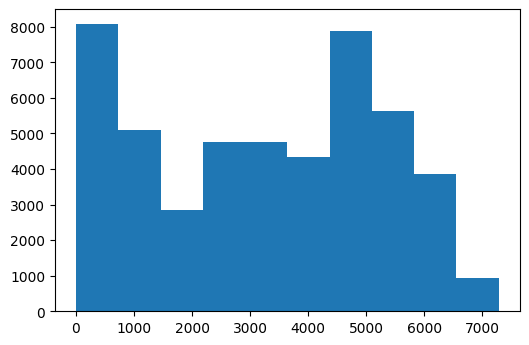

In [5]:
plt.hist(traffic["traffic_volume"])
plt.show()

In [6]:
traffic["date_time"].min()

'2012-10-02 09:00:00'

In [7]:
traffic["date_time"].max()

'2018-09-30 23:00:00'

In [8]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the above visualization and `Series.describe()` method, we can observe that the average traffic frequency between 2012-10-02 & 2018-09-30 was 3259 vehicles per hour. We can see on the histogram that the most common traffic frequencies are found on left and right of the histogram - this means we have high occurences of low and high traffic. 75% of the time, the traffic frequency is 4933 vehicles per hour or lower, while 25% of the time it is 1193, which is 4 times less. We need to explore how this is affected by day and night hours.

## Traffic Volume: Day vs. Night


In order to be more efficient, we should split the data by day hours and night hours:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [9]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [10]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]


In [11]:
day.shape

(23877, 9)

In [12]:
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]


In [13]:
night.shape

(24327, 9)

We have split the data in `day` and `night` hours. Let's take a look at the histograms for the `traffic_volume` during the day and during the night:

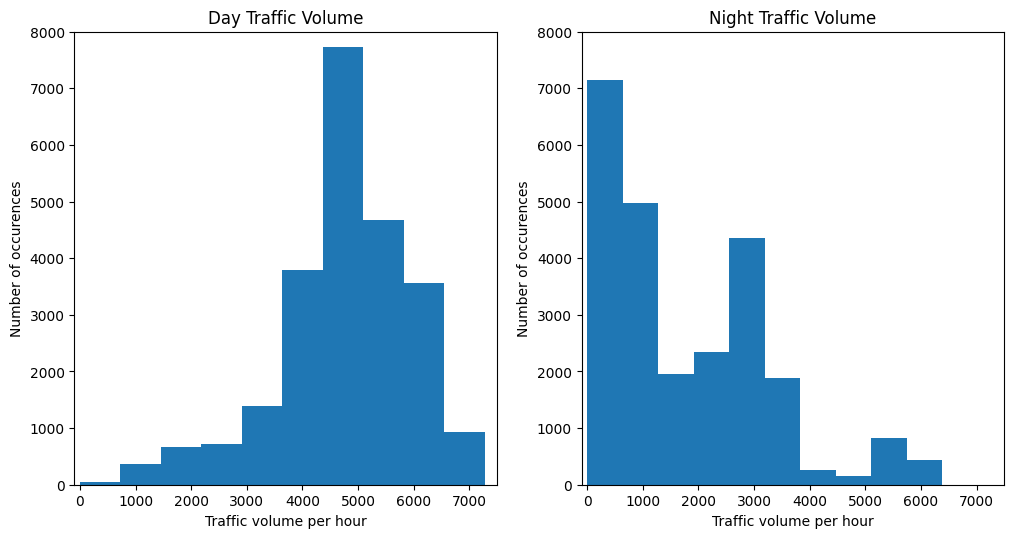

In [14]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("Day Traffic Volume")
plt.xlabel("Traffic volume per hour")
plt.ylabel("Number of occurences")
plt.ylim([0, 8000])
plt.xlim([-100, 7500])

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("Night Traffic Volume")
plt.xlabel("Traffic volume per hour")
plt.ylabel("Number of occurences")
plt.ylim([0, 8000])
plt.xlim([-100, 7500])

plt.show()

From the above, we can see that the traffic volume distribution is skewed to the left during the day hours, and to the right during the night. That means we see more volume during the day, and less during the night, as expected and in line with our prior observations.

Now, let's check some more statistics:

In [16]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can see that 75% of the time during the night, traffic volume is 2819 or lower, which falls below the 25% occurence range during the day hours. Based on this data, we can say that night time data can be ignored for this analysis, since we cannot quantify the night time traffic volume as high. Moving forward, we will focus only on the daytime data.

## Time Indicators

In this step, we will explore the various time periods and observe how the traffic volume is affected by certain times, such as days of the week, months, or time of day.

The easiest way to get the average traffic volumes for time periods is by using the `df.groupby()` method.

First, we will start with the months:

In [18]:
day["month"] = day["date_time"].dt.month #new column with month values only

In [19]:
by_month = day.groupby("month").mean()
#grouping the dataset by the month column with the mean as an
#aggregate function

In [20]:
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

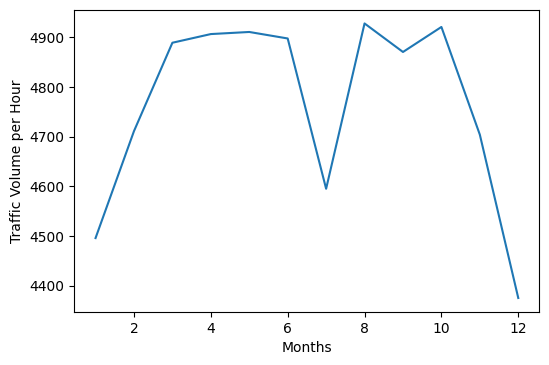

In [42]:
plt.plot(by_month["traffic_volume"])
plt.xlabel("Months")
plt.ylabel("Traffic Volume per Hour")
plt.show()

The above plot shows how the traffic volume changes with months. We can observe that it is ast the lowest level in December, then gradually increasing until it hits a high in March. It stays fairly high and constant from March until June, then drops significantly in July. In August we observe another increase, and it stays fairly constant until November.

These observations point to the conclusion that the traffic volume tends to be higher during the warmer months, with the exception of July. We will dig deeper to see why July is an exception.

To do this, we will extract Year values in a separate column, and then plot all average traffic volumes for July each year:

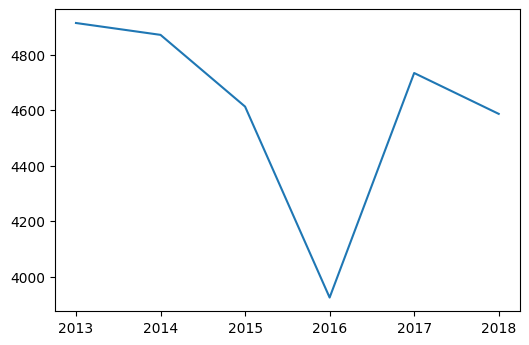

In [34]:
day["year"] = day["date_time"].dt.year
july_only = day[day["month"] == 7]
july_avg = july_only.groupby("year").mean()["traffic_volume"]
plt.plot(july_avg)
plt.show()

We can see in the plot that traffic volumes in July have a significant drop in 2016, which could be the reason why we saw the drop in volume by months plot. We can investigate further why this happened, but most likely it is due to some construction or lane closure.

Now, we can move on to days of the week:

In [35]:
day["dayofweek"] = day["date_time"].dt.dayofweek #new column with day of the week values only

In [36]:
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"]

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

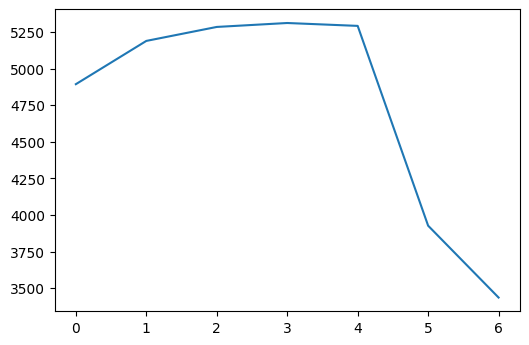

In [39]:
plt.plot(by_dayofweek["traffic_volume"])
plt.show()

We can see that the traffic volume decreases by up to 30% during the weekend, with the lowest day being Sunday.

Finally, we will move to hours of the day. Since wekends will reduce the average values, as we've seen above, we will look at the weekend averages separately.

First step is to split the data based on the day type - business day or weekend:

In [43]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] <= 4] #days 0-4: Monday to Friday
weekend = day.copy()[day["dayofweek"] > 4]

In [45]:
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [48]:
by_hour_business["traffic_volume"]

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [49]:
by_hour_weekend["traffic_volume"]

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

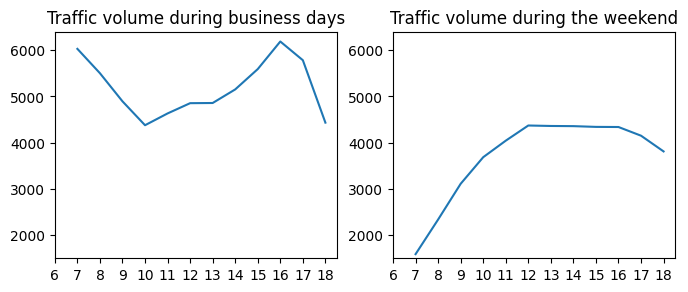

In [65]:
plt.figure(figsize = (8,3))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Traffic volume during business days")
plt.xlim([6, 18.5])
plt.ylim([1500, 6400])
plt.xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Traffic volume during the weekend")
plt.xlim([6, 18.5])
plt.ylim([1500, 6400])
plt.xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.show()

We can observe that, during the business days, peak hours tend to be at 7 and 16h, which corresponds with the times when majority of people go to and from work.

During the weekends, we see an increase in traffic as the days go on, starting very low in the morning, then gradually increasing towards the noon. In general, highest traffic volumes during the weekend is equal to the lowest traffic volumes during the business days. 

Therefore, if you need to use the I-94, aim for the weekend mornings, or non-commuting hours during the workdays.

## Time indicators - Summary

We have concluded in the above analysis:
* the most busy months are from March until October, while colder months are less busy.
* weekends tend to be less busy than wordays
* during the business days, rush hours tend to occur at 7 and 16h, while during the weekends mornings are less busy

## Weather indicators

In [73]:
traffic.corr()[["traffic_volume"]]

,traffic_volume
temp,0.130299
rain_1h,0.004714
snow_1h,0.000733
clouds_all,0.067054
traffic_volume,1.000000


Out of all the potential weather indicators, it seems only temp has a somewhat significant correlation, being positively correlated. Let's make a scatter plot for this correlation:

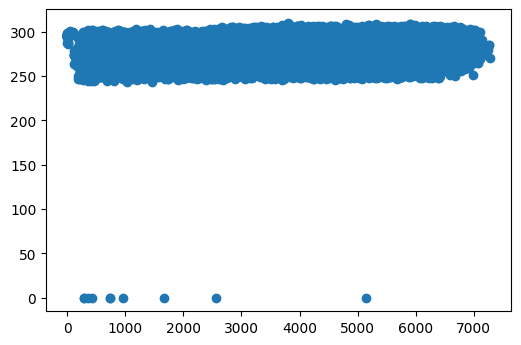

In [74]:
plt.scatter(traffic["traffic_volume"], traffic["temp"])
plt.show()

There are some unusual outliers where temoperature is equal to 0K, which is not possible. We will adjust the y-limits to eliminate these and improve the scatter plot view.

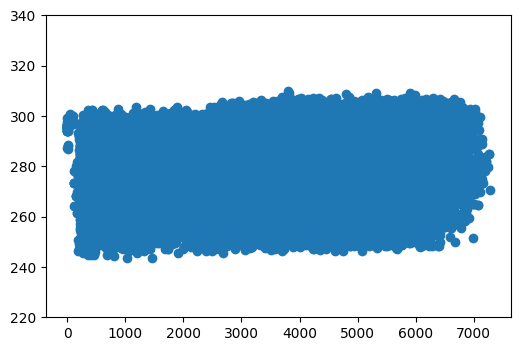

In [80]:
plt.scatter(traffic["traffic_volume"], traffic["temp"])
plt.ylim([220, 340])
plt.show()

This looks better. Let's take a look between day and night hours:

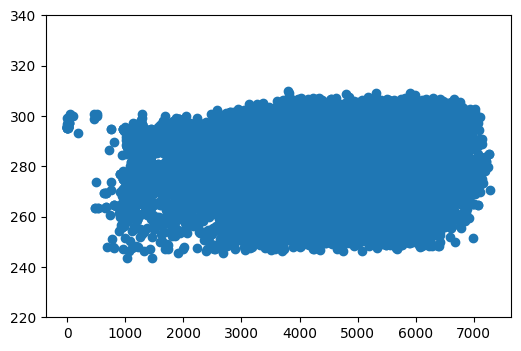

In [78]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim([220, 340])
plt.show()

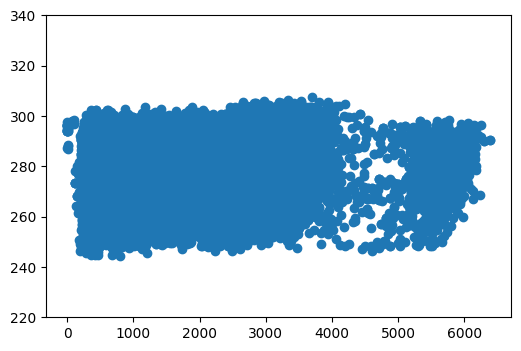

In [81]:
plt.scatter(night["traffic_volume"], night["temp"])
plt.ylim([220, 340])
plt.show()

We can observe a slight positive correlation, but it is not strong enough for us to detrmine the temperature as a reliable weather indicator. None of the potential numerical columns can be considered as reliable weather indicators

Next, we will analyze the categorical variables `weather_main` and `weather_description`. First, we need to aggregate the categorical columns using `mean()` as an aggregate function:

In [84]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_description = day.groupby('weather_description').mean()

In [86]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2015.527574,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344,12.153370


In [98]:
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_description,,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2016.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2014.723005,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2015.266380,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,2015.762590,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2015.139983,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,2014.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2015.793103,2.896552,12.275862


We see that `by_weather_description` has a more granular structure, a lot of different categories, so we might be able to pull more information from it.

We will now plot horizontal bar charts for both aggregated sets:

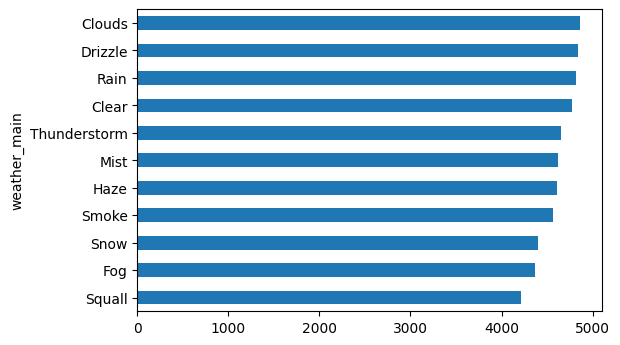

In [97]:
by_weather_main["traffic_volume"].sort_values().plot.barh()
plt.show()

This chart doesn't tell us much. We know that traffic volume during business days is above 5000 vehicles per hour, while the above chart shows 0 potential weather indicators with volumes over 5000.

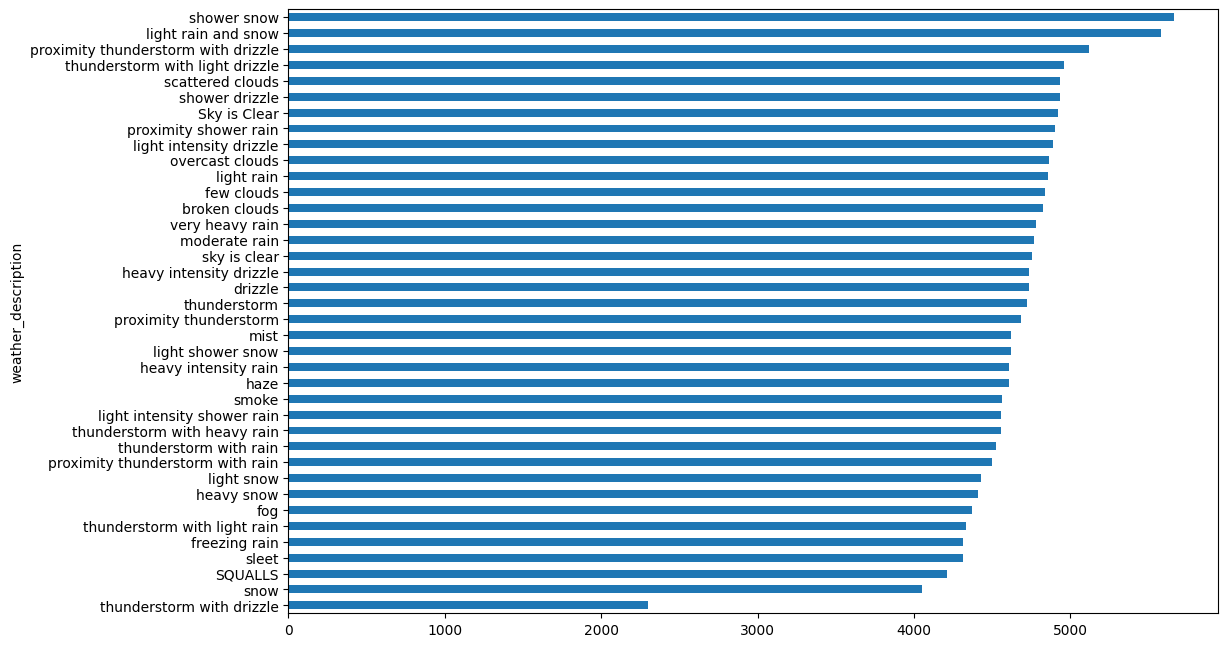

In [96]:
by_weather_description["traffic_volume"].sort_values().plot.barh(figsize=(12,8))
plt.show()

In the above chart we can observe there are 3 indicators with volumes over 5000:
* shower snow
* light rain and snow
* proximity thunderstorm with drizzle

Why these indicate such high volume is unclear, since we can see similar or worse weather description categories with much lower corresponding traffic volumes. Most likely people are deciding upon driving while weather is wet and cold, although there is no sufficient data to fully support this claim. But, it is observable that bad weather will reduce traffic volume by a greater margin than good weather.

In addition, we can see that volumes are lower when weather conditions are very bad and/or affect visibility and road conditions - sleet, freezing rain, fog, smoke, squalls etc.

It is unclear why there is such a big difference in traffic volume when comparing thunderstorm with drizzle and proximity thunderstorm with drizzle.

## Conclusion

Throughout this project, we have analyzed the traffic dataset in order to determine indicators for the heavy traffic.

Our final conclusions are that warmer months lead to heavier traffic, with July being an outlier due to certain events which occured in 2016 (possibly construction or closure). Going further, business days are more busy than weekends, with rush hours at 7 and 16h. Weekends are less busy, but it is still advisable to travel in the mornings when traffic is really light.
Finally, we couldn't find any strong correlations between weather conditions and traffic volume, other than weather conditions which severely affect road conditions or visibility - in these cases people prefer not to drive; and cold, wet weather conditions - when people most likely decide on alternative modes of transportation. We would need more weather  data and less granular weather conditions variable set in order to fully support these claims.